<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/10_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Average / Mean

list_of_numbers = [6, 8, 12, 3, 9, -5]

def calculate_mean(list_of_numbers):
  sum = 0

  for number in list_of_numbers:
    sum += number

  return sum / len(list_of_numbers)

print(calculate_mean(list_of_numbers))

5.5


In [ ]:
list_of_numbers = [6, 8, 12, 3, 9, -5, 99]
list_of_numbers_2 = [6, 8, 12, 3, 9, -5]

def calculate_median(list_of_numbers):
  list_of_numbers.sort()

  if len(list_of_numbers) % 2 == 0:
    return (list_of_numbers[len(list_of_numbers) // 2] + list_of_numbers[len(list_of_numbers) // 2 - 1]) / 2
  else:
    return list_of_numbers[len(list_of_numbers) // 2]

print(calculate_median(list_of_numbers))
print(calculate_median(list_of_numbers_2))

8
7.0


In [ ]:
#Modalna
list_of_numbers = [4, 2, 7, 2, 8, 2, 9, 7, 7]

def find_mode(list_of_numbers):
  count_occurrence = {i: list_of_numbers.count(i) for i in set(list_of_numbers)}
  print(count_occurrence)
  mode = [key for value, key  in zip(count_occurrence.values(), count_occurrence.keys()) if value == max(count_occurrence.values())]
  return mode

print(find_mode(list_of_numbers))


{2: 3, 4: 1, 7: 3, 8: 1, 9: 1}
[2, 7]


Wariancja grupy A 1.3
Wariancja grupy B 1.5
Odchylenie standardowe grupy A 1.140175425099138
Odchylenie standardowe B 0.75


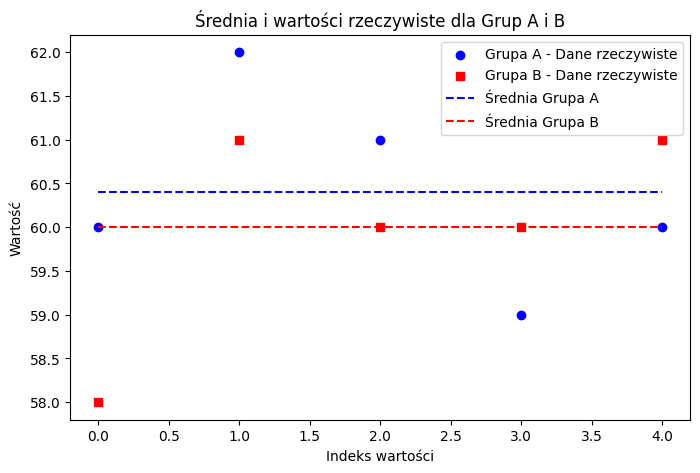

In [ ]:
#Wariancja
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mean_A = 0
mean_B = 0

def calculate_variance(group):
  mean = statistics.mean(group)
  variance = sum((x - mean) ** 2 for x in group) / (len(group) - 1)
  return variance, mean

groupA = [60, 62, 61, 59, 60]
groupB = [58, 61, 60, 60, 61]


varianceA, mean_A = calculate_variance(groupA)
varianceB, mean_B = calculate_variance(groupB)

print(f"Wariancja grupy A {varianceA}")
print(f"Wariancja grupy B {varianceB}")

print(f"Odchylenie standardowe grupy A {varianceA ** (1/2)}")
print(f"Odchylenie standardowe B {varianceB ** 1/2}")


y_values_A = [mean_A] * len(groupA)
y_values_B = [mean_B] * len(groupB)


# Tworzenie wykresu
plt.figure(figsize=(8, 5))
x_values = list(range(len(groupA)))

# Scatter plot dla wartości grupy A i B
plt.scatter(x_values, groupA, color="blue", label="Grupa A - Dane rzeczywiste", marker="o")
plt.scatter(x_values, groupB, color="red", label="Grupa B - Dane rzeczywiste", marker="s")

# Wykres linii dla średnich
plt.plot(x_values, y_values_A, color="blue", linestyle="dashed", label="Średnia Grupa A")
plt.plot(x_values, y_values_B, color="red", linestyle="dashed", label="Średnia Grupa B")

# Opisy osi i tytuł
plt.xlabel("Indeks wartości")
plt.ylabel("Wartość")
plt.title("Średnia i wartości rzeczywiste dla Grup A i B")

# Legenda
plt.legend()
plt.show()

In [ ]:
def correlation(x, y):

    #Obliczamy średnią wartość dla zmiennej x i y
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    #Obliczamy licznik - sumę iloczynów różnic wartości dla zmiennych x i y oraz ich średnich
    numenator = 0

    for value_x, value_y in zip(x, y):
      numenator += (value_x - mean_x) * (value_y - mean_y)

    #Obliczamy mianownik - pierwiastek z  iloczynu sumy  kwadratów różnic wartości X od średniej X i  sumy kwadratów różnic wartości Y od średniej Y
    denominator_x = 0
    denominator_y = 0

    for value_x, value_y in zip(x, y):
      denominator_x += (value_x - mean_x) ** 2
      denominator_y += (value_y - mean_y) ** 2

    denominator = (denominator_x * denominator_y  ) ** 0.5

    correlation = numenator / denominator
    return correlation


temperature =     [10, 12, 14, 16, 18, 20, 22, 24, 26]
sold_ice_creams = [20, 30, 40, 80, 90, 20, 130, 160, 20]

# Obliczenie korelacji
r_value = correlation(temperature, sold_ice_creams)
print(f"Współczynnik korelacji: {r_value:.2f}")

Współczynnik korelacji: 0.44


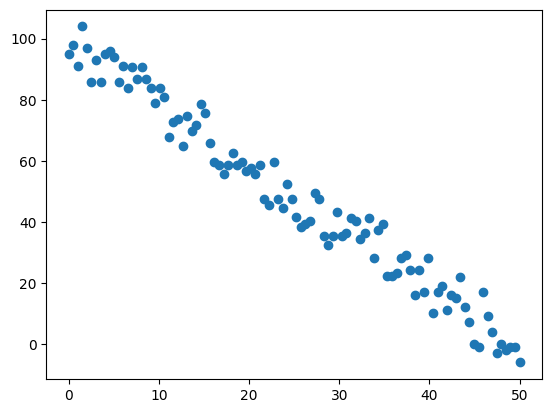

In [ ]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.random(42)

X = np.linspace(0, 50, 100)

noise = np.random.randint(-10, 10, 100)
Y = -2 * X + 100 + noise

plt.scatter(X, Y)
plt.show()

In [ ]:
#Funkcja wyznaczająca krzywą regresji

def regression(x,y):
  sum_of_xy = 0
  sum_x = 0
  sum_y = 0
  sum_x_squared = 0
  n = len(x)

  for x_value, y_value in zip(x,y):
    sum_of_xy += x_value * y_value
    sum_x += x_value
    sum_y += y_value
    sum_x_squared += x_value ** 2


  a = (n*sum_of_xy - sum_x * sum_y) / (n*sum_x_squared - sum_x ** 2)
  b = (sum_y - a * sum_x) / n

  return a, b

print(regression(X, Y))

(-2.0178455445544503, 98.80613861386126)


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_array = np.array(X).reshape(-1, 1)
# print(np.array(X))
# print(X_array)
Y_array = np.array(Y)

model = LinearRegression()
model.fit(X_array, Y_array)

a = model.coef_[0]
b = model.intercept_

print(f"Współczynnik kierunkowy: {a}")
print(f"Przesunięcie: {b}")

Współczynnik kierunkowy: -2.017845544554455
Przesunięcie: 98.80613861386138


In [ ]:
#Regresja w praktyce
from sklearn.linear_model import LinearRegression
import numpy as np

#1 Przetasowanie wartości
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X))

# Przetasowanie X i Y zgodnie z tymi samymi indeksami
X_shuffled = X[shuffled_indices]
Y_shuffled = Y[shuffled_indices]

#2 Usunięcie 20% wartości i zapis ich do dataframe
split_point = int(0.8 * len(X_shuffled))

X_train = X_shuffled[:split_point]
Y_train = Y_shuffled[:split_point]
X_removed = X_shuffled[split_point:]
Y_removed = Y_shuffled[split_point:]

df_removed = pd.DataFrame({'X': X_removed, 'Y_rzeczywiste': Y_removed})

#3 Regresja liniowa na pozostałych danych

model = LinearRegression()
model.fit(X_array, Y_array)  # Trenowanie modelu

a = model.coef_[0]  # Nachylenie
b = model.intercept_  # Punkt przecięcia

print(f"Nachylenie a: {a}")
print(f"Punkt przecięcia b: {b}")

#4 Przewidywanie brakujących wartości Y i zapisanie ich do dataframe
df_removed["Y_prognozowane"] = a * df_removed["X"] + b

#5 Wyświetl dataframe
print(df_removed)

Nachylenie a: -2.112363636363637
Punkt przecięcia b: 101.70909090909092
           X  Y_rzeczywiste  Y_prognozowane
0  16.666667      68.666667        66.50303
1  33.333333      38.333333        31.29697
